# Lab 2 Probability, Distributions, and Statistical Questions

Igor Banin, Anthony Joo

## Problem 1

Average cosmic ray background: 5

Average gamma rays emitted by source: 8

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy import stats
from scipy.stats import chi2_contingency

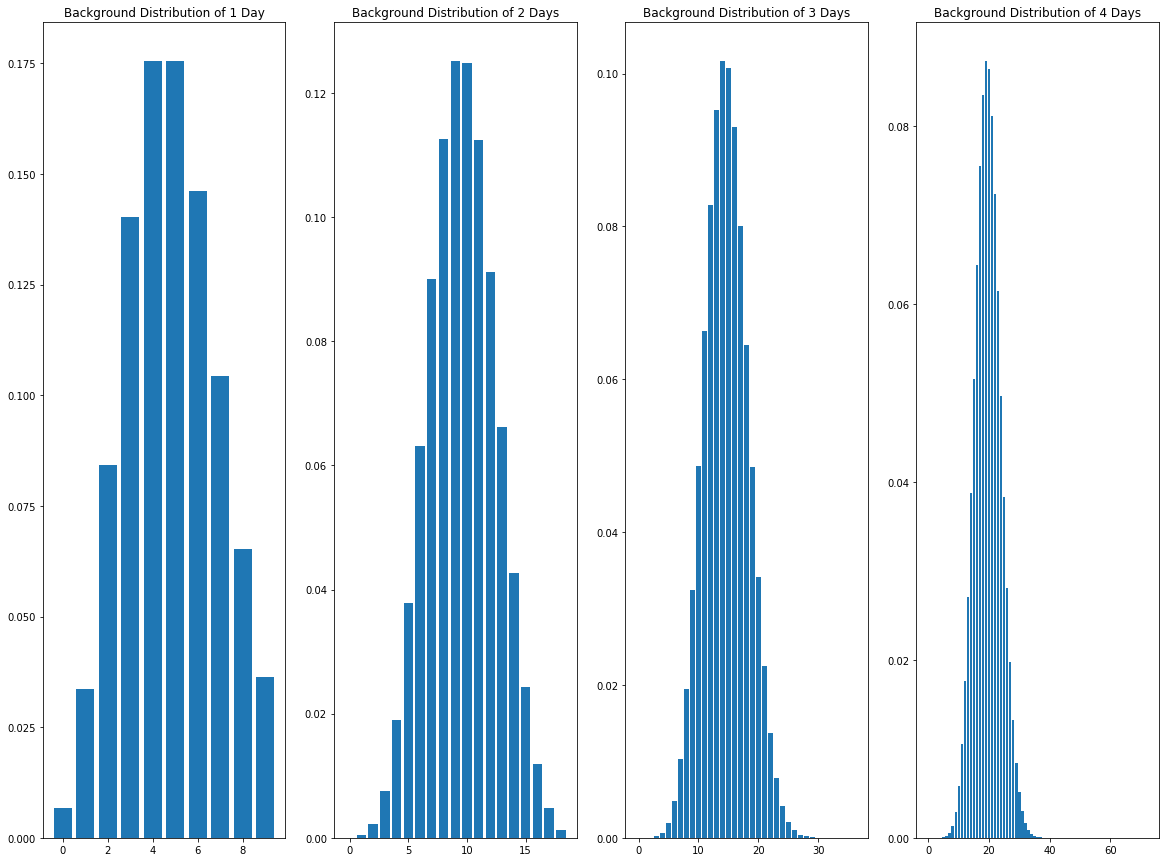

In [3]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)
mu = 5 #average cosmic ray background
x = np.arange(0,10)
ax[0].set_title("Background Distribution of 1 Day")
ax[0].bar(x, stats.poisson.pmf(x, mu))

a = np.convolve(stats.poisson.pmf(x, mu), stats.poisson.pmf(x, mu))
x = np.arange(0, len(a))
ax[1].set_title("Background Distribution of 2 Days")
ax[1].bar(x, a)
for i in range(2,4):
    a = np.convolve(a, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(a))
    ax[i].set_title("Background Distribution of " + str(i + 1) + " Days")
    ax[i].bar(x, a)
b = a

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

360.0
Chi-square value:  181692.00000000003  P-value:  0.0


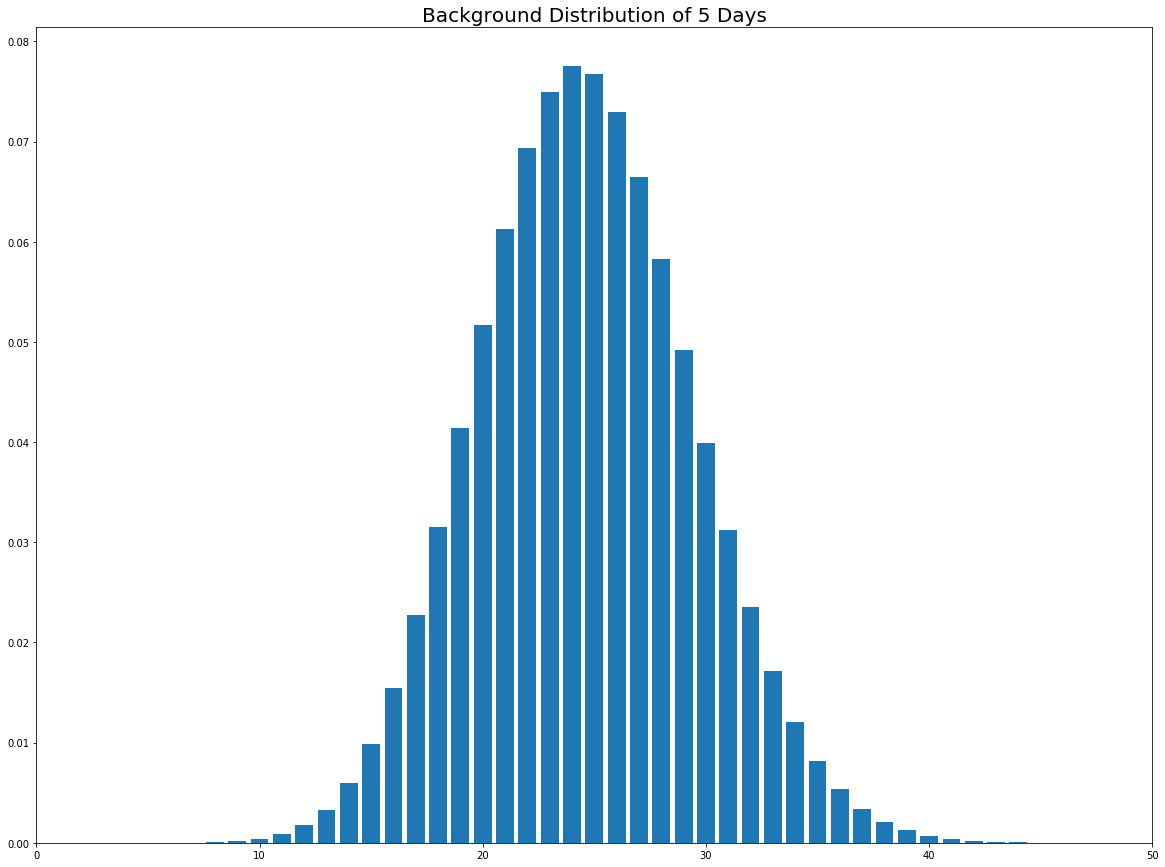

In [13]:
fig, ax = plt.subplots(1, 1)
d = np.convolve(b, stats.poisson.pmf(x, mu))
x = np.arange(0, len(d))
ax.set_title("Background Distribution of 5 Days", fontsize='20')
plt.xlim(0, 50)
ax.bar(x, d)

table = pd.crosstab(d, stats.poisson.pmf(x, mu))
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square value: ", chi2, " P-value: ", p)

Running the 5 times convolved poisson distriution and the regular poisson distribution under the goodness of fit, chi squared test. We find that the p value = 0 < 0.05: therefore we can reject the null hypothesis and conclude that the distributions are indeed correlated with one another. That is to say that the summed probability distribution is still a poisson distribution. This makes sense mathematically and conceptually because the equation for a poisson distribution has e^(lambda) in the numerator, the sum two poisson distributions is e^(lambda1)e^(lambda2) which equals e^(lambda1 + lambda2). Which finally gives us the equation some e^(lambda3), which follows the model of a poisson looking distribution. 

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

Averaging the days keeps the range of the x-axis in the same ball park as we keep convolving the poisson distribution. As the days get larger the peak of the probability distribution steadily decreases, the bars get closer and the distribution continues to get closer and closer to a gaussian distribution. In relation to B, the general shape of the distribution stays the same, because the sum of a poisson is still a poisson distribution. This is inline with the central limit theorem because regardless of the shape of the original distribution, as the sample size increases - the distribution should start to look more and more gaussian. 

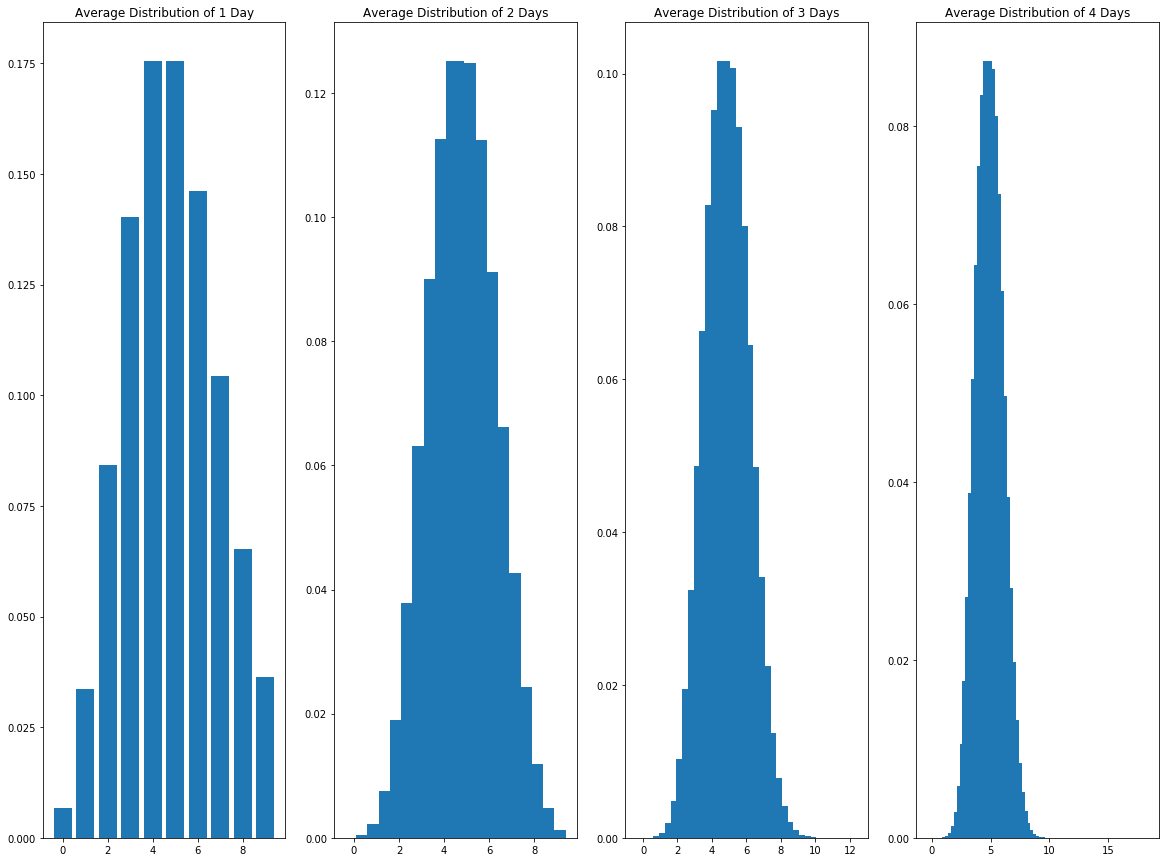

In [31]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)
mu = 5 #average cosmic ray background
x = np.arange(0,10)
ax[0].set_title("Average Distribution of 1 Day")
ax[0].bar(x, stats.poisson.pmf(x, mu))

a = np.convolve(stats.poisson.pmf(x, mu), stats.poisson.pmf(x, mu))
x = np.arange(0, len(a))
ax[1].set_title("Average Distribution of 2 Days")
ax[1].bar(x/2, a)
for i in range(2,4):
    a = np.convolve(a, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(a))
    ax[i].set_title("Average Distribution of " + str(i + 1) + " Days")
    ax[i].bar(x/(i+1), a)
b = a

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. (In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.)

In [20]:
N = 5 #number of days
Y = 8 #average number of gamma rays emmitted by source
gammaRays = N*Y

integral = stats.poisson.cdf(gammaRays,25) #Finds the specific cumulative probablity associated with sigma
print("Probability: " + str(integral))
sigma =  stats.norm.ppf(integral) #Finds the sigma associated to the probablity
print("Associated Sigma: " + str(sigma))

Probability: 0.9979644007190178
Associated Sigma: 2.8725917394181684


## Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

A) Show how the distribution changes as you average over more observing intervals.

(array([1.16074993e+01, 2.75037950e+01, 2.85831354e+01, 1.96035952e+01,
        9.75078906e+00, 3.61956472e+00, 1.07117896e+00, 2.32598860e-01,
        3.87664767e-02, 6.12102264e-03]),
 array([5.88500737e-05, 9.86113370e-03, 1.96634173e-02, 2.94657010e-02,
        3.92679846e-02, 4.90702682e-02, 5.88725519e-02, 6.86748355e-02,
        7.84771191e-02, 8.82794028e-02, 9.80816864e-02]),
 <a list of 10 Patch objects>)

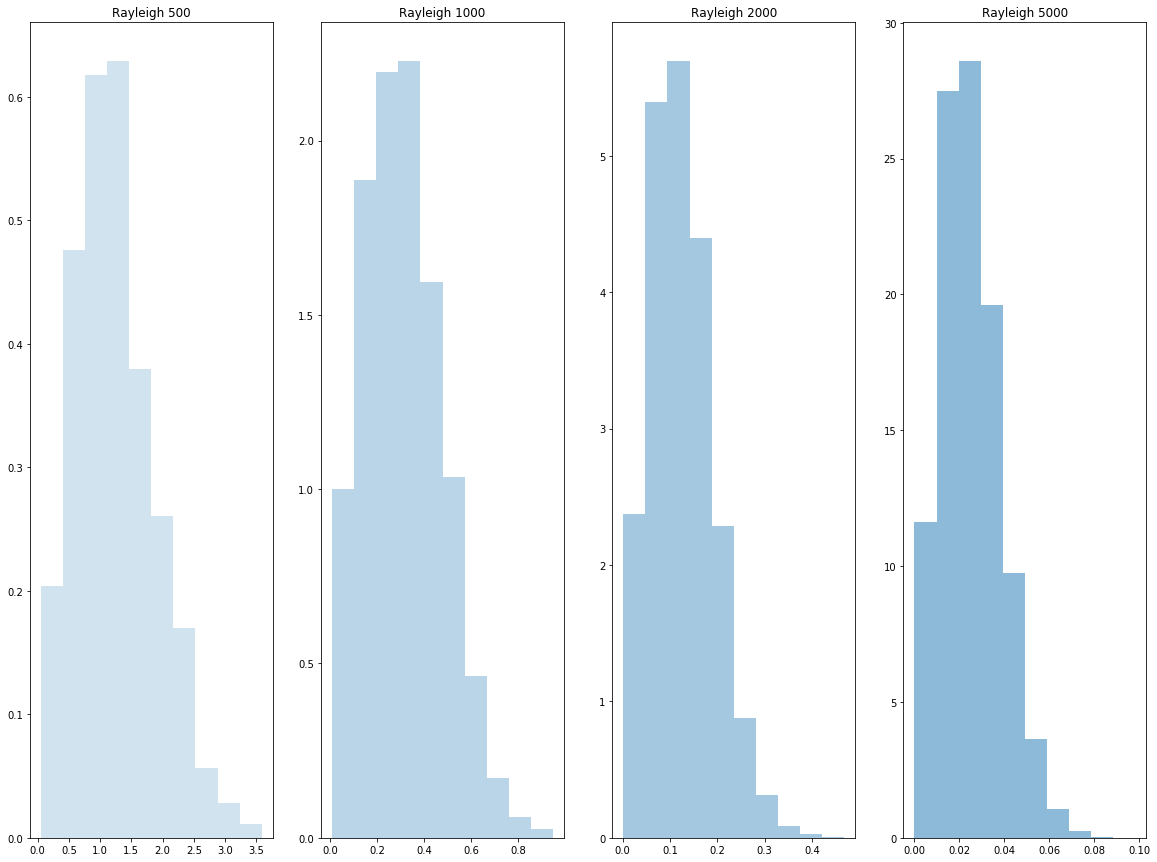

In [52]:
from scipy.stats import rayleigh

plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)

r = rayleigh.rvs(size=500)
ax[0].set_title("Rayleigh 500")
ax[0].hist(r, density=True, alpha=0.2)

r2 = rayleigh.rvs(size=2000)
ax[1].set_title("Rayleigh 2000")
ax[1].hist(r2/4, density=True, alpha=0.3)

r3 = rayleigh.rvs(size=5000)
ax[2].set_title("Rayleigh 5000")
ax[2].hist(r3/10, density=True, alpha=0.4)

r4 = rayleigh.rvs(size=50000)
ax[3].set_title("Rayleigh 50000")
ax[3].hist(r4/50, density=True, alpha=0.5)

B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

It seems as you average over more and more intervals the general shape of the skewed Rayleigh distribution maintains, but the x-axis range shrinks dramatically, while the number of occurrences in y goes up. (Does not obey the central limit theorem as it does not seem that the distribution is becoming more normal.)

## Problem 3

